In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
"""
This is just a giant file full of commands we'll type into a python shell.
You probably don't want to import this or run this directly.
"""
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

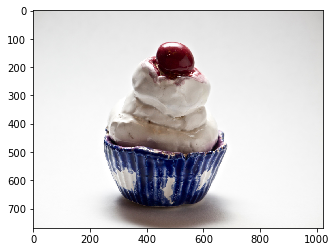

In [3]:
# Load an image & display it.
im = Image.open('img/cake.jpg')

#im.show()
imshow(im)

In [5]:
# Images have some intersting attrubutes
print(im.format)
print(im.size)
print(im.mode)

JPEG
(1024, 768)
RGB


# Thumbmails

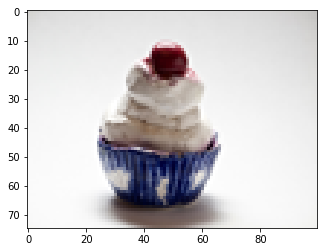

In [6]:
size = (100, 100)  # width, height
im.thumbnail(size)
im.save("thumb.jpg", "JPEG")
#im.show()
imshow(im)

# Resizing

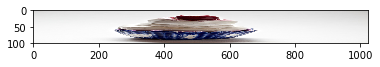

In [12]:
result = im.resize((1024, 100))
imshow(result)

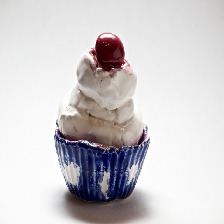

In [4]:
result = im.resize((224, 224))
result

In [ ]:
 result.crop(box=[224,224])
imshow(result)

# Simple rotations

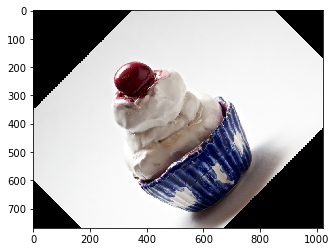

In [13]:
im = Image.open('img/cake.jpg')

result = im.rotate(45)
imshow(result)

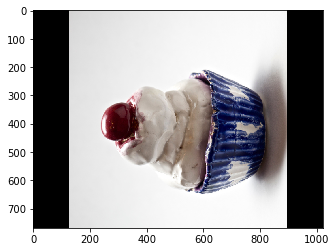

In [14]:
result = im.rotate(90)
imshow(result)

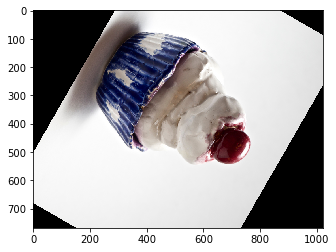

In [15]:
result = im.rotate(-120)
imshow(result)

# Cropping

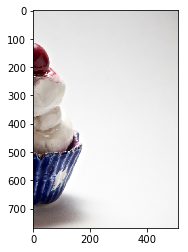

In [16]:
box = (512, 0, 1024, 768)  # (left, upper, right, lower), with (0, 0) top-left
result = im.crop(box)
imshow(result)

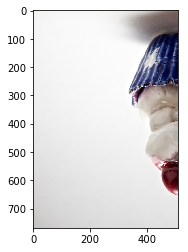

In [17]:
# - rotate the cropped image and past it back in the original
result = result.transpose(Image.ROTATE_180)
im.paste(result, box)
imshow(result)

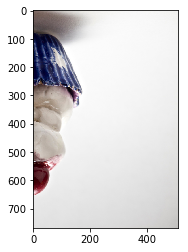

In [18]:
# - Flip the cropped image and paste it back in
result = result.transpose(Image.FLIP_LEFT_RIGHT)
im.paste(result, box)
imshow(result)

# Colors

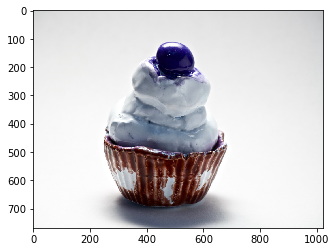

In [22]:
# - channels
im = Image.open('img/cake.jpg')
r, g, b = im.split()
result = Image.merge("RGB", (b, g, r))
imshow(result)

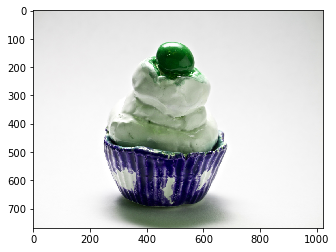

In [23]:
result = Image.merge("RGB", (g, r, b))
imshow(result)

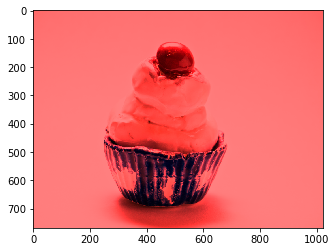

In [25]:
# - L-mode: single-band, black & white
im = Image.open('img/cake.jpg').convert("L")
im.getbands()  # ('L', )

# - point operations modify individual pixels!
r = r.point(lambda i: i * 2)  # double red values
g = g.point(lambda i: int(i/2))  # half green values
b = b.point(lambda i: int(i/2))  # half blue values
result = Image.merge("RGB", (r, g, b))

imshow(result)


(array([ 255.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([      0.,   68529.,  137058.,  205587.,  274116.,  342645.,
         411174.,  479703.,  548232.,  616761.,  685290.]),
 <a list of 10 Patch objects>)

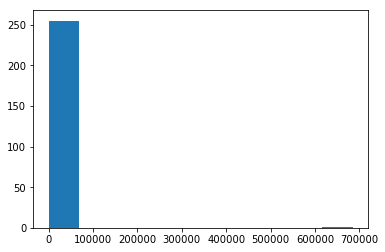

In [35]:
# - inspect pixel values
plt.hist(r.histogram())  # list of values in the range 0 - 255 (black - white)

# Apply a mask

In [41]:
im = Image.open('img/cake.jpg')
r, g, b = im.split()
mask = b.point(lambda i: i < 100 and 255)  # where BLUE is less than 100
b = b.point(lambda i: i * 2)  # double blue pixel values
b.paste(b, mask=mask)  # apply mask to the blue band
im = Image.merge(im.mode, (r, g, b))  # merge them all

In [42]:
def thresh(pixel_value):
    """Threshold a image."""
    if pixel_value < 200:
        return 0
    return 255

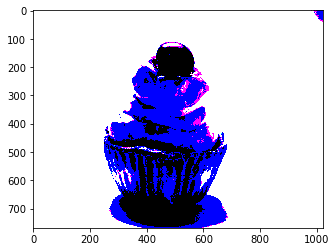

In [43]:
result= Image.eval(im, thresh)
imshow(result)

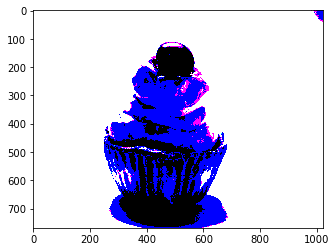

In [44]:
im = im.point(thresh)  # Can also do this with the point method.
imshow(im)

# Enhance

In [58]:
from PIL import ImageEnhance

# 50% more contrast
im = Image.open('img/cake.jpg')
en = ImageEnhance.Contrast(im)

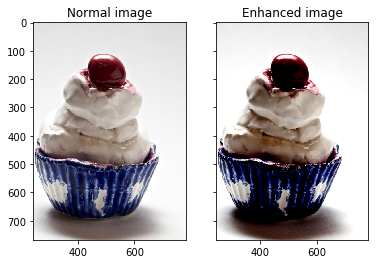

In [64]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(im)
ax1.set_title('Normal image')
ax2.imshow(en.enhance(1.5))
ax2.set_title('Enhanced image 50% more contrast')

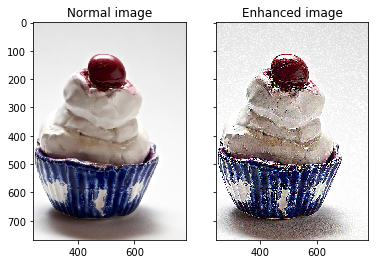

In [67]:
# 15x sharper
en = ImageEnhance.Sharpness(im)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(im)
ax1.set_title('Normal image')
ax2.imshow(en.enhance(15))
ax2.set_title('Enhanced image 15x sharper')

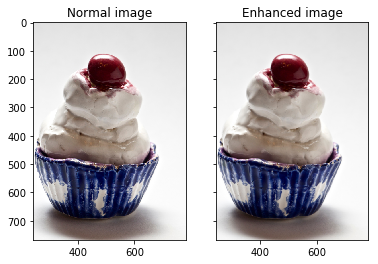

In [68]:
# Light Smoothing...
en = ImageEnhance.Sharpness(im)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(im)
ax1.set_title('Normal image')
ax2.imshow(en.enhance(0.1))
ax2.set_title('Enhanced image, smothing 0.1')

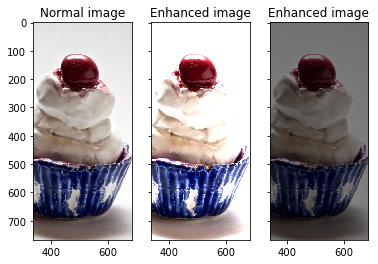

In [69]:
# Brightness
en = ImageEnhance.Brightness(im)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True)
ax1.imshow(im)
ax1.set_title('Normal image')
ax2.imshow(en.enhance(1.5)) # 50% brighter
ax2.set_title('Enhanced image')
ax3.imshow(en.enhance(0.5))  # 50% darker
ax3.set_title('Enhanced image')



# PIL  Filters

In [248]:

from PIL import ImageFilter

im = Image.open('img/cake.jpg')
blur =      im.filter(ImageFilter.GaussianBlur(radius=8))
contour =   im.filter(ImageFilter.CONTOUR)
find_edges= im.filter(ImageFilter.FIND_EDGES)
sharpen=    im.filter(ImageFilter.SHARPEN)
smooth=     im.filter(ImageFilter.SMOOTH)

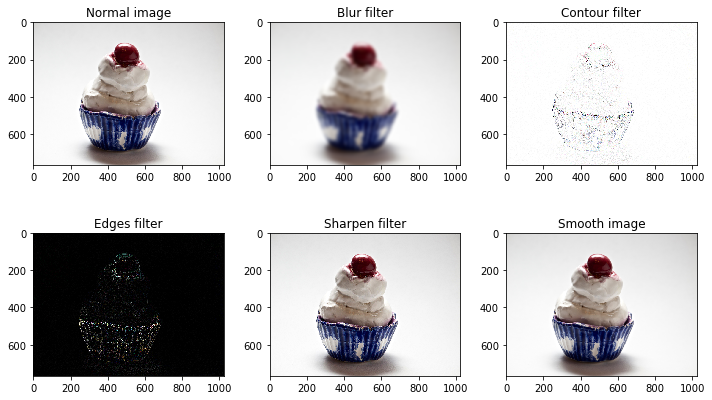

In [249]:
fig = plt.figure()

fig.set_figheight(6)
fig.set_figwidth(10)

ax1 = fig.add_subplot(2,3,1)
ax1.imshow(im)
ax1.set_title('Normal image')
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(blur) 
ax2.set_title('Blur filter')

ax3 = fig.add_subplot(2,3,3)
ax3.imshow(contour)  # 50% darker
ax3.set_title('Contour filter')

ax4 = fig.add_subplot(2,3,4)
ax4.imshow(find_edges)
ax4.set_title('Edges filter')

ax5 = fig.add_subplot(2,3,5)
ax5.imshow(sharpen) # 50% brighter
ax5.set_title('Sharpen filter')

ax6 = fig.add_subplot(2,3,6)
ax6.imshow(smooth)  # 50% darker
ax6.set_title('Smooth image')
plt.tight_layout()
plt.show()


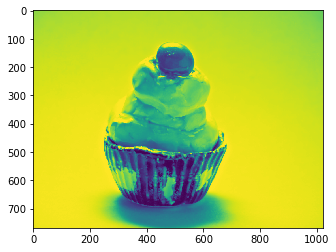

In [104]:
# Use filters to minimize some colors, maximize the rest.
im = Image.open('img/cake.jpg')
r, g, b = im.split()

# run a MaxFilter over the red channel
r = r.filter(ImageFilter.MaxFilter(size=3))
imshow(r)

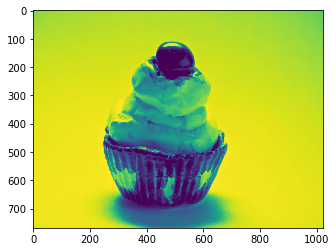

In [105]:
# run MinFilters over the blue & green channels
g = g.filter(ImageFilter.MinFilter(size=3))
imshow(g)

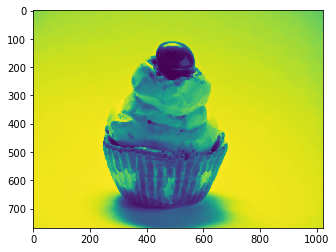

In [107]:
b = b.filter(ImageFilter.MinFilter(size=3))
imshow(b)

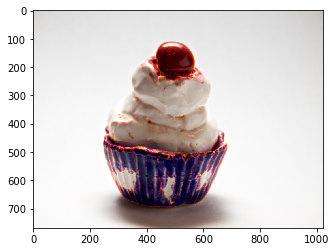

In [108]:
# merge the results
result = Image.merge("RGB", (r, g, b))
imshow(result)

# Custom convolution Kernels

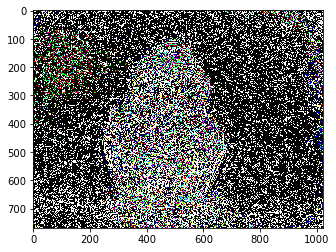

In [109]:
# See: https://en.wikipedia.org/wiki/Kernel_(image_processing)
size = (3, 3)
kernel = [
    0,  1, 0,
    1, -4, 1,
    0,  1, 0
]
k = ImageFilter.Kernel((3, 3), kernel=kernel)
result = im.filter(k)
imshow(result)

In [110]:
# NOTE: You can look at the built-in filters' arguments.
ImageFilter.EMBOSS.filterargs
# ((3, 3), 1,     128,    (-1, 0, 0, 0, 1, 0, 0, 0, 0))
#  size,   scale, offset, kernel

((3, 3), 1, 128, (-1, 0, 0, 0, 1, 0, 0, 0, 0))

# Channel Operations

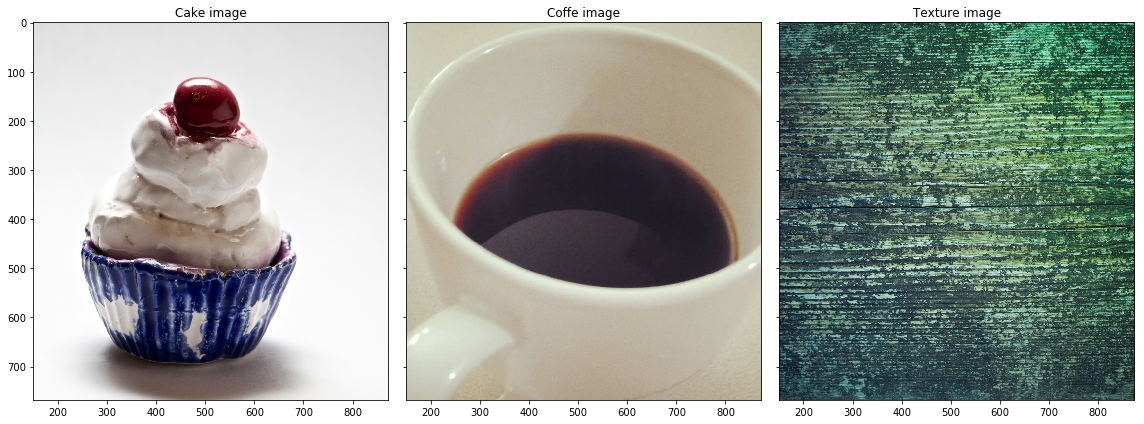

In [128]:
from PIL import ImageChops

im1 = Image.open('img/cake.jpg')
im2 = Image.open('img/coffee.jpg')
texture = Image.open('img/texture.jpg')


f, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True)
f.set_figheight(6)
f.set_figwidth(16)


ax1.imshow(im1)
ax1.set_title('Cake image')
ax2.imshow(im2) # 50% brighter
ax2.set_title('Coffe image')
ax3.imshow(texture)  # 50% darker
ax3.set_title('Texture image')

plt.tight_layout()
plt.show()

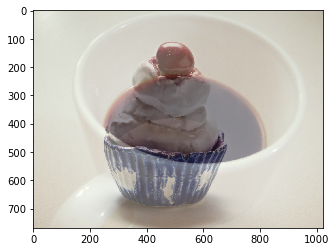

In [115]:
# Blending and merging images.
alpha = 0.5
bl1 = ImageChops.blend(im1, im2, alpha)  # merge equally (0.5)
imshow(bl1)

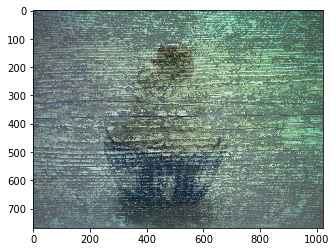

In [182]:
# or
bl2 = Image.blend(im1, texture, 0.7)
imshow(bl2)


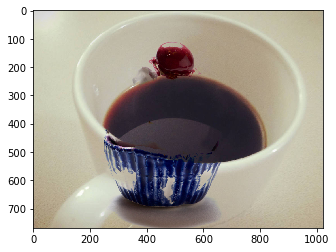

In [121]:
dark = ImageChops.darker(im1, im2)  # mix, keeping darker pixels.
imshow(dark)

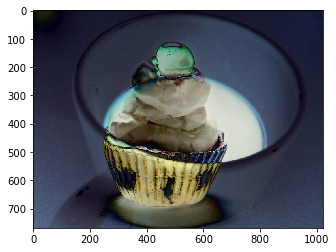

In [122]:
sub = ImageChops.difference(im1, im2)  # subtract im2 pixel values from im1
imshow(sub)

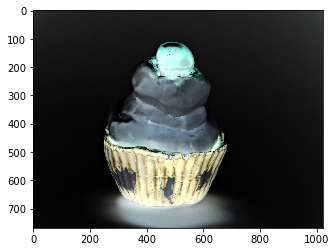

In [123]:
inv = ImageChops.invert(im1)  # Invert an image
imshow(inv)

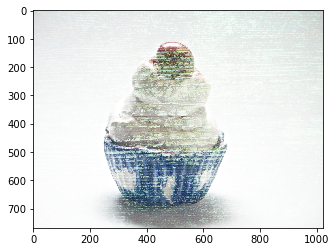

In [124]:
textchop = ImageChops.screen(im1, texture)
imshow(textchop)

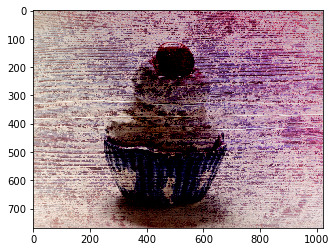

In [126]:
textsub =ImageChops.subtract(im1, texture)
imshow(textsub)

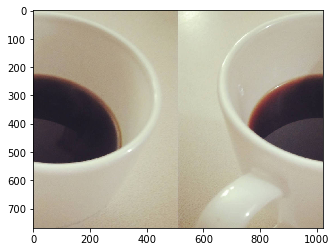

In [127]:
# offset is fun.
offset = ImageChops.offset(im2, 512, 0)
imshow(offset)

In [129]:
# load images from a directory, modify them, and write back to the same place
def process(num):
    """Do edge detection on each frame"""
    input_file = "img/frames/me{0:03d}.png"
    output_file = "img/frames/me_processed{0:03d}.png"
    for i in range(1, num + 1):
        filename = input_file.format(i)
        im = Image.open(filename)

        # Edges
        im = im.convert("L")
        im = im.filter(ImageFilter.FIND_EDGES)

        output = output_file.format(i)
        im.save(output)


def process_ghost(num):
    """Blend each frame with a previous one."""
    input_file = "img/frames/me{0:03d}.png"
    output_file = "img/frames/me_processed{0:03d}.png"
    for i in range(1, num + 1):
        filename = input_file.format(i)
        im = Image.open(filename)

        im = im.convert("L")
        if i > 1 and i <= num + 1:
            prev = Image.open(input_file.format(i - 1)).convert("L")
            im = ImageChops.blend(im, prev, 0.5)

        output = output_file.format(i)
        im.save(output)


def process_thresh(num):
    """threshold each frame."""
    input_file = "img/frames/me{0:03d}.png"
    output_file = "img/frames/me_processed{0:03d}.png"
    for i in range(1, num + 1):
        filename = input_file.format(i)
        im = Image.open(filename)
        im = im.point(thresh)

        output = output_file.format(i)
        im.save(output)

# Adding noise

In [184]:
from scipy.ndimage import filters
from scipy import misc

In [260]:
def add_speckle_noise(image):
    image = np.array(image)
    row,col,ch = image.shape
    gauss = np.random.randn(row,col,ch)
    gauss = gauss.reshape(row,col,ch)        
    noisy = image + image * gauss
    return Image.fromarray(noisy.astype('uint8'), 'RGB')    

In [261]:
def add_poisson_noise(image):
    vals = len(np.unique(image))
    vals = 2 ** np.ceil(np.log2(vals))
    noisy = np.random.poisson(np.array(image) * vals) / float(vals)
    return Image.fromarray(noisy.astype('uint8'), 'RGB')

In [262]:
def add_gauss_noise(img):
    imgnp = np.array(img,dtype=float)
    imgnp += np.random.normal(loc=imgnp.mean(), scale= imgnp.std(), size= imgnp.shape)
    return Image.fromarray(imgnp.astype('uint8'), 'RGB')    

In [263]:
def add_salt_pepper_noise(image):
    s_vs_p = 0.5
    amount = 0.04
    image = np.array(image)
    out = image
    # Generate Salt '1' noise
    num_salt = np.floor(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
    out[coords] = 255
    # Generate Pepper '0' noise
    num_pepper = np.floor(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
    out[coords] = 0
    return Image.fromarray(out.astype('uint8'), 'RGB')

In [264]:
%timeit s_p = add_salt_pepper_noise(im1)

18.2 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [265]:
%timeit poisson = add_poisson_noise(im1)

452 ms ± 47.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [266]:
%timeit gauss = add_gauss_nois(im1)

435 ms ± 203 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [267]:
im1 = Image.open('img/cake.jpg')

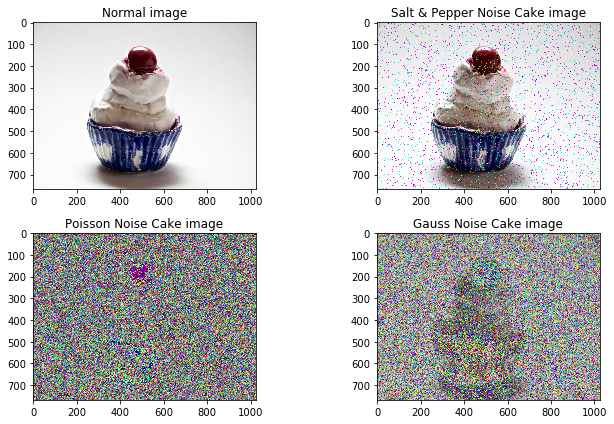

In [268]:
fig = plt.figure()

fig.set_figheight(6)
fig.set_figwidth(10)

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(im1)
ax1.set_title('Normal image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(s_p)
ax2.set_title('Salt & Pepper Noise Cake image')


ax3 = fig.add_subplot(2,2,3)
ax3.imshow(poisson)  
ax3.set_title('Poisson Noise Cake image')


ax4 = fig.add_subplot(2,2,4)
ax4.imshow(gauss)  
ax4.set_title('Gauss Noise Cake image')


plt.tight_layout()
plt.show()

